# Project: Interesting movie facts

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

We will name our dataframe "df" and get a general overview of how it looks like

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

After getting a general overview, it is also great to know with the type of data we are working:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As we can see, we are mostly working with strings. From this preliminary analysis, and for the purpose of this project, the most important columns are "popularity", "original_title", "genres", "budget_adj" and "revenue_adj". We will use the last two to remove the effects of inflation and being able to compare the data properly.

We also have some values that we will have to correct in the following section.

We can also run a histogram of the whole dataset to see if we can get any insights.

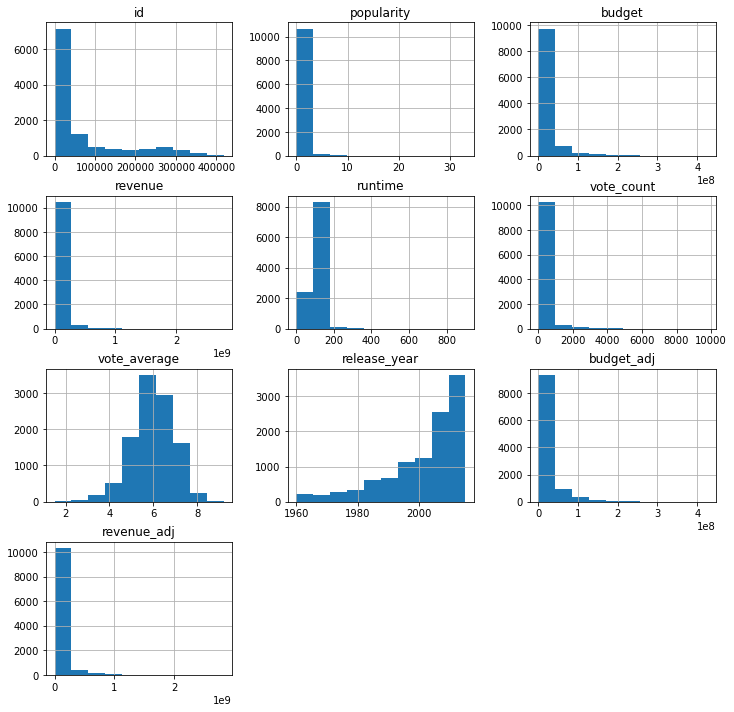

In [4]:
df.hist(figsize = (12,12));

The most valuable insights we can get from the graphic analysis are:
<ul>
<li>A lot of movies has been done in the last 20 years.</li>
<li>The average vote results is around 6.</li>
</ul>

All the other histograms do not provide enough information to draw a conclusion

### Data Cleaning

As we can see, we have a few missing values from some colums:

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

I am going to drop all the missing columns from fields "imdb_id", "cast", "director", "overview", "genres" because they are a few. They probably will not make any difference when analyzing the whole set of data so I would rather delete them than having them with a general observation like "unknown". If they were ints or floats, I could replace the values with the mean of the whole column but they are strings.

In [6]:
df.dropna(subset = ["imdb_id", "cast", "director", "overview", "genres"], inplace = True)

There are a few fields we can drop as they do not give any important information about the analysis I am going to dot. This fields are "homepage", "tagline", "keywords" and "production_companies". Fields like "budget" and "revenue" are also not important as we will use the adjustedt ones.

In [7]:
df.drop(["homepage", "tagline", "keywords", "production_companies", "budget", "revenue"], axis = 1, inplace =True)

After performing some actions to clean the dataset, all null values have been removed:

In [8]:
df.isnull().sum()

id                0
imdb_id           0
popularity        0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [9]:
df.head()

id    imdb_id  popularity                original_title  \
0  135397  tt0369610   32.985763                Jurassic World   
1   76341  tt1392190   28.419936            Mad Max: Fury Road   
2  262500  tt2908446   13.112507                     Insurgent   
3  140607  tt2488496   11.173104  Star Wars: The Force Awakens   
4  168259  tt2820852    9.335014                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1  Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
2         Adventure|Science Fiction|Thriller      3/18/15        2480   
3   Action|Adventure|Science Fiction|Fantasy     12/15/15        5292   
4                      Action|Crime|Thriller       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

<a id='eda'></a>
## Exploratory Data Analysis

### What is the most popular genre?

The easiest way to achieve this is by performing a describe on the "genres" column.

In [10]:
df["genres"].describe()

count     10725
unique     2020
top       Drama
freq        710
Name: genres, dtype: object

As we can see, the most popular genre by this method is Drama. It is important to notice that a lot of movies are a mix of different genres so, we can only say that that the most popular pure genre is Drama. We can group the movies with only one genre associated in this "pure genre" definition.

### What is the most popular genre by decade?

In order to answer this question, we have to group the data in decades:

In [11]:
d1960 = df[(df["release_year"] >= 1960) & (df["release_year"] < 1970)]
d1970 = df[(df["release_year"] >= 1970) & (df["release_year"] < 1980)]
d1980 = df[(df["release_year"] >= 1980) & (df["release_year"] < 1990)]
d1990 = df[(df["release_year"] >= 1990) & (df["release_year"] < 2000)]
d2000 = df[(df["release_year"] >= 2000) & (df["release_year"] < 2010)]
d2010 = df[(df["release_year"] >= 2010) & (df["release_year"] < 2020)]

As we can see in the following data, the most popular genre for the decades are:
<ul>
    <li>60's: Drama</li>
    <li>70's: Drama</li>
    <li>80's: Comedy</li>
    <li>90's: Comedy</li>
    <li>00's: Comedy</li>
    <li>10's: Drama</li>
</ul>

This data also support the calculation of the most popular genre done in the previous step: Drama.

In [12]:
d1960.genres.describe()

count       358
unique      196
top       Drama
freq         25
Name: genres, dtype: object

In [13]:
d1970.genres.describe()

count       505
unique      259
top       Drama
freq         25
Name: genres, dtype: object

In [14]:
d1980.genres.describe()

count       1054
unique       458
top       Comedy
freq          78
Name: genres, dtype: object

In [15]:
d1990.genres.describe()

count       1760
unique       641
top       Comedy
freq         103
Name: genres, dtype: object

In [16]:
d2000.genres.describe()

count       3521
unique       987
top       Comedy
freq         242
Name: genres, dtype: object

In [17]:
d2010.genres.describe()

count      3527
unique      892
top       Drama
freq        318
Name: genres, dtype: object

### What is the highest budget movie?

By running the following code, we can see that the most expensive movie in the list is "The Warrior's Way".

In [18]:
df[df["budget_adj"] == df.budget_adj.max()].original_title

2244    The Warrior's Way
Name: original_title, dtype: object

### What is the highest revenued movie?

By running the following code, we can see that the movie with the highest revenue is "Avatar"

In [19]:
df[df["revenue_adj"] == df.revenue_adj.max()].original_title

1386    Avatar
Name: original_title, dtype: object

### What is the most profitable movie?

In order to calculate this, we have to make a new column. We will calculate it in absolute terms. To do that, we will substrate the budget to the revenue.

In [20]:
df["profit_adj"] = df["revenue_adj"] - df["budget_adj"]

And, as we can see in the following line, the most profitable movie is "Star Wars"

In [21]:
df[df["profit_adj"] == df.profit_adj.max()].original_title

1329    Star Wars
Name: original_title, dtype: object

But, what about in relative terms? What is the film that got the highest revenue for the budget. We can calculate it by doing the following:

In [22]:
df["profit_rel_adj"] = df["revenue_adj"] % df["budget_adj"]

And, as we can see in the following line, the most profitable movie in relative terms is "Pirates of the Caribbean: On Stranger Tides". In other words, the most cost-effective film was "Pirates of the Caribbean: On Stranger Tides".

In [23]:
df[df["profit_rel_adj"] == df.profit_rel_adj.max()].original_title

3375    Pirates of the Caribbean: On Stranger Tides
Name: original_title, dtype: object

### What is the worst movie in economic terms?

Again, we can calculate it in relative or absolute terms. In absolute terms:

In [24]:
df[df["profit_adj"] == df.profit_adj.min()].original_title

2244    The Warrior's Way
Name: original_title, dtype: object

And "The Warrior's Way" is the worst movie in terms of profit. This makes a lot of sense since it was the highest budget movie on the list.

In relative terms:

In [25]:
df[df["profit_rel_adj"] == df.profit_rel_adj.min()].original_title

48                      Wild Card
67                       Survivor
93                           Vice
133             Louder Than Bombs
145                 Bone Tomahawk
                   ...           
10827                      Batman
10832                   Arabesque
10841                The Shooting
10855     The Ghost & Mr. Chicken
10865    Manos: The Hands of Fate
Name: original_title, Length: 1312, dtype: object

We cannot draw any conclusion from the last statement. This is probably due to  the value being 0 or close to 0.

### What is the most popular movie?

We can base this calculation in a few different ways. For example, the movie with the most votes (as one vote would be one view) would be the most viewed in the list:

In [26]:
df[df["vote_count"] == df.vote_count.max()].original_title

1919    Inception
Name: original_title, dtype: object

As we see, the most popular movie, measured in count votes is "Inception". 

But what about the most popular one in terms of popularity?

In [27]:
df[df["popularity"] == df.popularity.max()].original_title

0    Jurassic World
Name: original_title, dtype: object

In terms of popularity, the most popular movie is "Jurassic World"

### Are more popular movies more profitable?

In order to calculate this, we can scatter plots. In the X axis, we will scatter the popularity while the profit will be in the Y axis. As we can see in the graph below, there is not a strong correlation between both. This means that more popular movie does not mean it is more profitable.

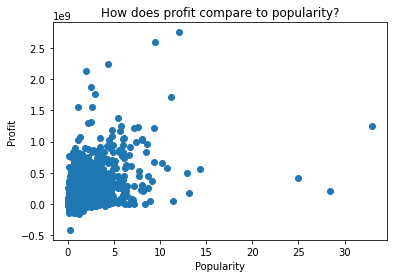

In [28]:
plt.scatter(df["popularity"], df["profit_adj"])
plt.xlabel("Popularity")
plt.ylabel("Profit")
plt.title("How does profit compare to popularity?");

### How does value relate to profit? And revenue?

We will scatter plots to see if there is any correlation. As we can see in the graph below, it seems that there is a positive correlation between the movies that have higher average votes and profit. This could mean that, when the public gives a movie a good rating, the probability of it being more profitable can be higher.

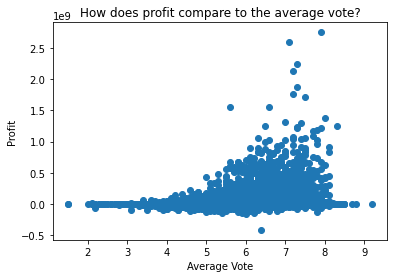

In [29]:
plt.scatter(df["vote_average"], df["profit_adj"])
plt.xlabel("Average Vote")
plt.ylabel("Profit")
plt.title("How does profit compare to the average vote?");

When we compare the vote average with the revenue, the correlation is even stronger. We could say that the higher a movie gets rated, the higher the revenue is.

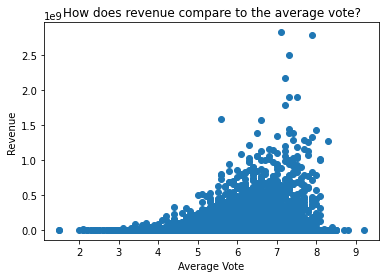

In [30]:
plt.scatter(df["vote_average"], df["revenue_adj"])
plt.xlabel("Average Vote")
plt.ylabel("Revenue")
plt.title("How does revenue compare to the average vote?");

### Are recent movies better than old movies?

In order to answer this question, we need to define what is a new movie and and old movie. In order to get more consistent values, we will make the split at the percentile 50. This way, 50% of the movies will be old and 50% will be new.

In [31]:
df.release_year.describe()

count    10725.000000
mean      2001.255012
std         12.822147
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

As we can see, the year 2006 is the one that separates 50% of the total values so, from 2006 (included) until 2015, we will consider it a new movie. From 1960 to 2006, we will consider an old movie.

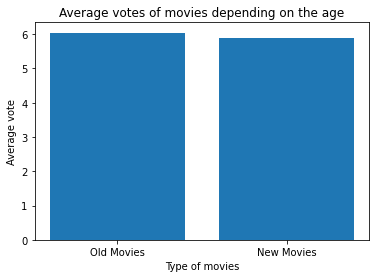

In [32]:
old_movies = df.query('release_year < 2006').vote_average.mean()
new_movies = df.query('release_year >= 2006').vote_average.mean()

plt.bar(["Old Movies", "New Movies"], [old_movies, new_movies])
plt.xlabel("Type of movies")
plt.ylabel("Average vote")
plt.title("Average votes of movies depending on the age");

As we can see, old movies are voted slightly better than new movies. But the difference is not enough to affirm that old movies are better than new movies.

<a id='conclusions'></a>
## Conclusions

We may run down the conclusions obtained in the following:
<ul>
    <li>The most popular genre for the whole dataset is Drama. There are a few problems with this calculation because a lot of movies have more than one genre attached. This was not take into account when calculating.</li>
    <li>This genre has been changing along the decades. From the 60's to the 80's, the most popular genre was Drama. From the 80's to the 10's, Comedy. From the 10's, Drama again.</li>
    <li>The movie with the highest budget is "The Warrior's Way", which, at the same time, has been the worst profitable movie in the whole dataset.</li>
    <li>The highest revenued movie is "Avatar". However, it is not the most profitable one. It is "Star Wars"</li>
    <li>More popularity does not necessary imply more profit.</li>
    <li>A higher vote could imply more revenue or profit.</li>
    <li>Old movies are better voted than new movies.</li>
</ul>